In [1]:
'''
1，马尔可夫平稳收敛性验证
2，对Beta分布进行采样：
'''

# 1，马尔可夫平稳收敛性验证：
import numpy as np

transfer_matrix = np.array([[0.6,0.2,0.2],[0.3,0.4,0.3],[0,0.3,0.7]], dtype=np.float32)
start_matrix = np.array([[0.5, 0.2, 0.3]], dtype=np.float32)
for i in range(30):
    print(start_matrix)
    start_matrix = np.dot(start_matrix, transfer_matrix)

[[0.5 0.2 0.3]]
[[0.36 0.27 0.37]]
[[0.29700002 0.291      0.412     ]]
[[0.26550004 0.2994     0.43510002]]
[[0.24912003 0.30339003 0.44749004]]
[[0.24048904 0.30542704 0.45408404]]
[[0.23592155 0.30649385 0.45758474]]
[[0.23350109 0.30705726 0.45944178]]
[[0.23221783 0.30735567 0.46042663]]
[[0.2315374  0.30751383 0.4609489 ]]
[[0.2311766  0.3075977  0.46122587]]
[[0.23098528 0.30764216 0.46137273]]
[[0.23088382 0.30766577 0.4614506 ]]
[[0.23083003 0.30767825 0.4614919 ]]
[[0.23080151 0.3076849  0.46151382]]
[[0.23078638 0.30768842 0.46152544]]
[[0.23077837 0.3076903  0.4615316 ]]
[[0.23077412 0.30769128 0.4615349 ]]
[[0.23077187 0.3076918  0.46153665]]
[[0.23077068 0.3076921  0.46153757]]
[[0.23077005 0.30769226 0.46153808]]
[[0.23076972 0.30769235 0.46153834]]
[[0.23076954 0.30769238 0.4615385 ]]
[[0.23076946 0.3076924  0.46153858]]
[[0.23076941 0.30769244 0.4615386 ]]
[[0.23076938 0.30769244 0.46153864]]
[[0.23076937 0.30769244 0.46153864]]
[[0.23076935 0.30769244 0.46153864]]
[[0

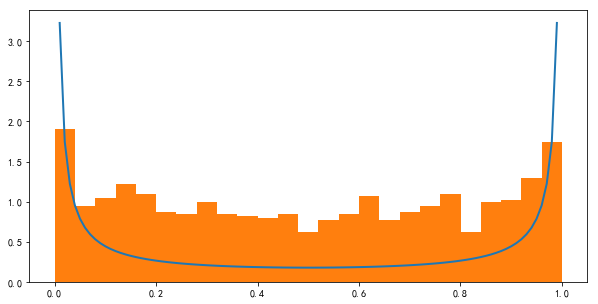

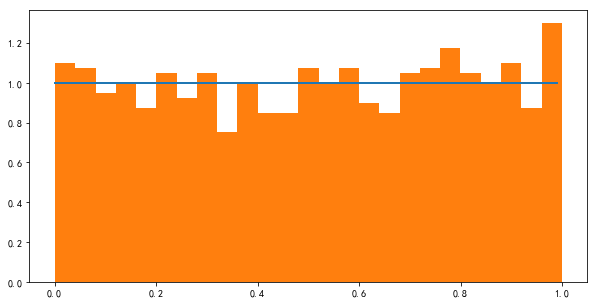

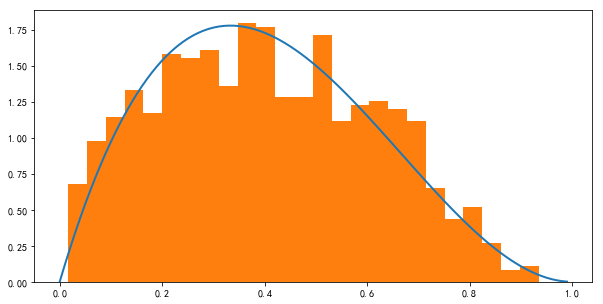

In [2]:
# 2，对Beta分布进行采样: 已知Beta分布的pdf(概率密度函数)
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # 屏蔽警告


def beta_s(x, a, b):
    return x**(a-1)*(1-x)**(b-1)

def beta(x, a, b):  # Beta distribution的概率密度函数（pdf）
    return beta_s(x, a, b)/ss.beta(a, b)

def plot_mcmc(a, b):
    cur = np.random.rand()
    states = [cur]  # 取一个初始化的状态
    for i in range(10**5):
        next = np.random.rand()  # 选择一个新的 Proposal State
        u = np.random.rand()
        if u < np.min((beta_s(next, a, b)/beta_s(cur, a, b), 1)):
            states.append(next)
            cur = next
    x = np.arange(0, 1, .01)
    plt.figure(figsize=(10, 5))
    plt.plot(x, beta(x, a, b), lw=2, label='real dist: a={}, b={}'.format(a, b))
    plt.hist(states[-1000:], 25, normed=True, label='simu mcmc: a={}, b={}'.format(a, b))
    plt.show()


plot_mcmc(0.1, 0.1)
plot_mcmc(1, 1)
plot_mcmc(2, 3)